In [181]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy.matlib


## Resize the image to get a smaller image of half size 

### Resizing in the space domain by subsampling

In [182]:
def resizing_smaller_space_domain(img): 
    X_test_resized = []
    kernel = np.ones((2,2),np.float32)/4

    # apply the 2x2 mean filter on the image
    img = np.array(img, dtype=np.int16)
    img_filtered = cv2.filter2D(img,-1,kernel)
    
    # subsampling the filtred image
    res = img_filtered[::2,::2]
    
    return(res)



### Resizing in the Fourier domain

In [183]:
def resizing_smaller_fourier_domain(img):
   
    # transform into Fourier domain
    fourier_img = np.fft.fftshift(np.fft.fft2(img))
    
    # we eliminate half of the columns and half of the lines
    width_len = len(fourier_img[0])
    height_len = len(fourier_img[1]) 
    subsampled_fourier_img = []
    for row in fourier_img[height_len//4 : (3*height_len)//4]:
           subsampled_fourier_img.append(row[width_len//4 : (3*width_len)//4])
        
    res = np.fft.ifft2(np.fft.ifftshift(subsampled_fourier_img)).real

    return (res)


## Resize the image to get a bigger image of half size 

In [184]:
#zoom by zero padding
def resizing_bigger_fourier_domain(img): 
    K = 2;
    S= img.shape
    
    F = np.fft.fftshift(np.fft.fft2(img))
    F2 = np.matlib.repmat( K*K*F , K , K)
    
    Mask = np.zeros((K*S[0],K*S[0]))
    Mask[1:S[0]//2+1 , 1:S[1]//2+1] = 1;
    Mask[K*S[0]-S[0]//2 : K*S[0] , 1:S[1]//2+1] = 1;
    Mask[1:S[0]//2+1 , K*S[0]-S[1]//2 :K*S[0] ] = 1;
    Mask[K*S[0]-S[0]//2 : K*S[0], K*S[0]-S[1]//2 :K*S[0] ] = 1;

    F2 = Mask*F2;

    I2 = np.real( np.fft.ifft2( F2 ))
    
    return (I2)




In [161]:
img = cv2.imread('barbara.jpg',0)

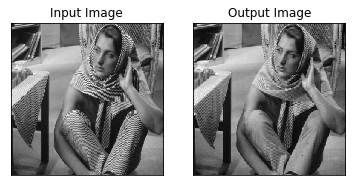

Size of Input Image (512, 512)
Size of Output Image (256, 256)


In [163]:
res = resizing_smaller_fourier_domain(img)
#res = resizing_smaller_space_domain(img)
#res = resizing_bigger_fourier_domain(img)
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()
print("Size of Input Image", img.shape)
print("Size of Output Image", res.shape)